In [1]:
# 导入所需的工具包
import numpy as np
import matplotlib.pyplot as plt

# tf中使用工具包
import tensorflow as tf
# 构建模型
from tensorflow.keras.models import Sequential
# 相关的网络层，所有神经元在Dense层里，Dropout随机失活（最常用的正则化方法），激活函数，BN层
from tensorflow.keras.layers import Dense,Dropout,Activation,BatchNormalization
# 导入辅助工具包
from tensorflow.keras import utils
# 正则化
from tensorflow.keras import regularizers
# 数据集
from tensorflow.keras.datasets import mnist

# 数据加载


In [2]:
# 加载数据集
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

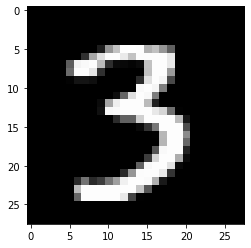

In [7]:
# 显示数据
#创建画布
plt.figure()
#输出
plt.imshow(x_train[10000],cmap="gray")

In [8]:
y_train[10000]

3

# 数据处理

In [38]:
# 数据维度的调整
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [39]:
# 数据类型调整
x_train = x_train.astype('float32')
x_test = x_test.astype("float32")

In [40]:
# 归一化
x_train = x_train/255
x_test = x_test/255

In [35]:
# 将目标值转换成热编码的形式
y_train = utils.to_categorical(y_train,10)
y_test = utils.to_categorical(y_test,10)

In [36]:
y_train.shape

(60000, 10)

# 模型构建

In [21]:
# 使用序列模型进行构建
model = Sequential()
# 全连接层：2个隐层，一个输出层
# 第一个隐层:512个神经元，先激活后BN，随机失活
model.add(Dense(512,activation = "relu",input_shape=(784,)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# 第二个隐层：512个神经元，先BN后激活，随机失活
model.add(Dense(512,kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))
# 输出层
model.add(Dense(10,activation="softmax"))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)              

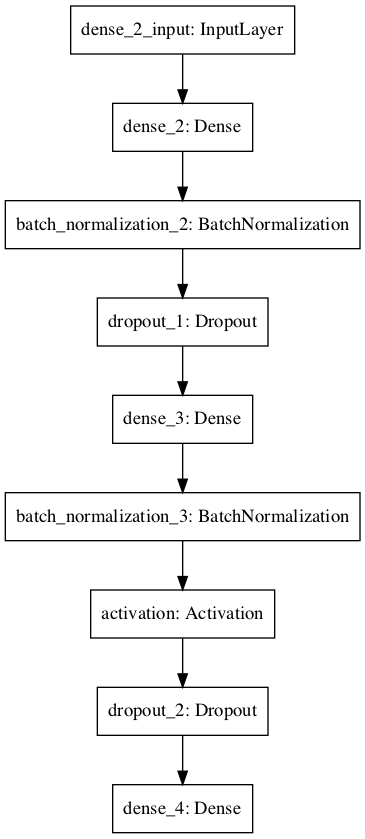

In [23]:
utils.plot_model(model)

# 模型编译

In [47]:
# 损失函数，优化器，评价指标
model.compile(loss= tf.keras.losses.categorical_crossentropy,optimizer = tf.keras.optimizers.Adam(),
              metrics=tf.keras.metrics.Accuracy())

# 模型训练

In [52]:
# 使用fit,指定训练集，epochs,batch_size,val,verbose
history = model.fit(x_train,y_train,epochs=4,batch_size=128,validation_data=(x_test,y_test),verbose=1)

Epoch 1/4
469/469 [==============================] - 2s 4ms/step - loss: 0.1235 - accuracy: 0.0088 - val_loss: 0.1619 - val_accuracy: 0.0124
Epoch 2/4
469/469 [==============================] - 2s 4ms/step - loss: 0.1225 - accuracy: 0.0084 - val_loss: 0.1584 - val_accuracy: 0.0093
Epoch 3/4
469/469 [==============================] - 2s 4ms/step - loss: 0.1179 - accuracy: 0.0084 - val_loss: 0.1595 - val_accuracy: 0.0120
Epoch 4/4
469/469 [==============================] - 2s 5ms/step - loss: 0.1113 - accuracy: 0.0091 - val_loss: 0.1399 - val_accuracy: 0.0057


In [53]:
history.history

{'loss': [0.12347722053527832,
  0.1224995031952858,
  0.11792848259210587,
  0.11130338907241821],
 'accuracy': [0.008786666207015514,
  0.00840499997138977,
  0.008430000394582748,
  0.009065000340342522],
 'val_loss': [0.16186854243278503,
  0.15844473242759705,
  0.15949705243110657,
  0.13993136584758759],
 'val_accuracy': [0.012380000203847885,
  0.009259999729692936,
  0.011950000189244747,
  0.0056500001810491085]}

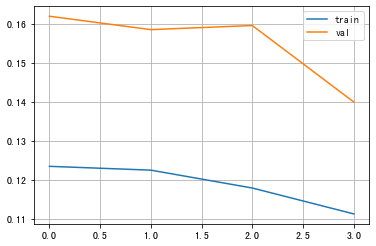

In [54]:
# 损失函数
plt.figure()
plt.plot(history.history['loss'],label="train")
plt.plot(history.history["val_loss"],label="val")
plt.legend()
plt.grid()

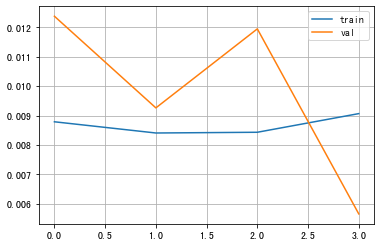

In [55]:
# 准确率
plt.figure()
plt.plot(history.history['accuracy'],label="train")
plt.plot(history.history["val_accuracy"],label="val")
plt.legend()
plt.grid()

In [56]:
# 回调函数
tensorboard = tf.keras.callbacks.TensorBoard(log_dir = "./graph")

In [57]:
# 训练
history = model.fit(x_train,y_train,epochs=4,validation_data=(x_test,y_test),batch_size=128,
                    verbose=1,callbacks=[tensorboard])

Epoch 1/4
  1/469 [..............................] - ETA: 0s - loss: 0.1043 - accuracy: 0.0109WARNING:tensorflow:From /opt/anaconda3/envs/dlcv/lib/python3.6/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
469/469 [==============================] - 2s 5ms/step - loss: 0.1092 - accuracy: 0.0093 - val_loss: 0.1541 - val_accuracy: 0.0091
Epoch 2/4
469/469 [==============================] - 2s 4ms/step - loss: 0.1070 - accuracy: 0.0096 - val_loss: 0.1400 - val_accuracy: 0.0076
Epoch 3/4
469/469 [==============================] - 2s 4ms/step - loss: 0.1059 - accuracy: 0.0097 - val_loss: 0.1472 - val_accuracy: 0.0090
Epoch 4/4
469/469 [==============================] - 2s 5ms/step - loss: 0.1018 - accuracy: 0.0111 - val_loss: 0.1462 - val_accuracy: 0.0136


# 模型评估

In [58]:
model.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.1462 - accuracy: 0.0136


[0.1461515724658966, 0.013629999943077564]

# 模型保存

In [59]:
# 保存
model.save("model.h5")

In [60]:
# 记载
loadmodel = tf.keras.models.load_model("model.h5")

In [61]:
loadmodel.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.1462 - accuracy: 0.0136


[0.1461515724658966, 0.013629999943077564]